# Data Visualisation

In [1]:
# Notebook magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# to import from src directory
import sys
sys.path.insert(0, '../..')

In [2]:
# Imports
import pandas as pd
import pandas_profiling as pdp
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import altair as alt

In [3]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Load Data

In [4]:
base_data_path = '/mnt/Development/My_Projects/fundamental_stock_analysis/data/'
raw_data_path = 'raw/stockpup/'
interim_data_path = 'interim/'

In [5]:
raw_data = pd.read_csv(base_data_path + raw_data_path + 'stockpup_raw_data.csv', index_col=0)

Add Features

In [ ]:
# Year-Quarter
dates = raw_data['Quarter end'].str.split(pat='-', expand=True)
raw_data['Year'] = dates[0].astype(int)
raw_data['Month'] = dates[1].astype(int)
raw_data['Day'] = dates[2].astype(int)
raw_data['Period'] = dates[0] + '-' + dates[1]
# raw_data.drop(['Quarter end'], axis=1, inplace=True)
raw_data['Quarter'] = (raw_data['Month']-1)//3+1  # should be (month-1)//3+1, but Quarter end date is ???
raw_data.shape

In [ ]:
# Sector-Industry

In [ ]:
tickers_info = pd.read_csv(base_data_path + 'tickers_info.csv', index_col=0)
tickers_info.shape

In [ ]:
raw_data = pd.merge(raw_data, tickers_info[['Ticker','Sector', 'Industry', 'Employees']])
print(raw_data.shape, len(set(raw_data['Ticker'])))

In [11]:
raw_data

,Quarter end,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,...,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,Ticker
0,2018-10-31,318533054.0,318533054.0,1.0,8.541000e+09,3.848000e+09,3.970000e+09,1.171000e+09,4.567000e+09,4000000.0,...,73.29,21.070,0.6044,0.3939,0.5347,0.0643,0.57,1.06,3.2861,A
1,2018-07-31,318769547.0,318769547.0,1.0,8.349000e+09,3.667000e+09,3.781000e+09,1.014000e+09,4.564000e+09,4000000.0,...,90.89,20.920,0.6215,0.3942,0.5467,0.0620,0.56,0.51,3.6164,A
2,2018-04-30,319952126.0,319952126.0,1.0,8.784000e+09,4.525000e+09,4.167000e+09,1.365000e+09,4.613000e+09,4000000.0,...,117.27,20.770,0.7603,0.3902,0.5252,0.0502,0.55,0.80,3.3150,A
3,2018-01-31,322476579.0,322476579.0,1.0,8.698000e+09,4.397000e+09,4.172000e+09,1.361000e+09,4.522000e+09,4000000.0,...,33.48,20.620,0.8925,0.3981,0.5199,0.0425,0.55,0.48,3.2307,A
4,2017-10-31,323018027.0,323018027.0,1.0,8.426000e+09,4.169000e+09,3.591000e+09,1.263000e+09,4.831000e+09,4000000.0,...,32.83,20.470,0.2477,0.3728,0.5733,0.1530,0.55,0.71,3.3009,A
5,2017-07-31,321828003.0,321828003.0,1.0,8.261000e+09,3.996000e+09,3.650000e+09,1.241000e+09,4.608000e+09,3000000.0,...,33.11,20.340,0.2581,0.3908,0.5578,0.1436,0.55,0.57,3.2200,A
6,2017-04-30,321337443.0,321337443.0,1.0,8.016000e+09,3.800000e+09,3.641000e+09,1.187000e+09,4.372000e+09,3000000.0,...,33.70,20.210,0.2718,0.4122,0.5454,0.1341,0.55,0.67,3.2013,A
7,2017-01-31,322300905.0,322300905.0,1.0,7.872000e+09,3.635000e+09,3.572000e+09,1.089000e+09,4.297000e+09,3000000.0,...,33.00,20.080,0.3011,0.4194,0.5459,0.1195,0.55,0.26,3.3379,A
8,2016-10-31,321747881.0,321747881.0,1.0,7.802000e+09,3.635000e+09,3.556000e+09,9.450000e+08,4.243000e+09,3000000.0,...,31.42,19.940,0.3200,0.4506,0.5438,0.1099,0.55,0.57,3.8466,A
9,2016-07-31,324384755.0,324384755.0,1.0,7.734000e+09,3.530000e+09,3.388000e+09,1.151000e+09,4.343000e+09,3000000.0,...,31.86,19.830,0.3028,0.3804,0.5615,0.1166,0.55,0.54,3.0669,A


Normalize

In [ ]:
columns = raw_data.columns.values
column_names_to_not_normalize = ['Quarter end','Ticker','Year','Month','Day','Period','Quarter','Price change','Label','Sector','Industry' ]
column_names_to_normalize = [x for x in list(columns) if x not in column_names_to_not_normalize ]

In [ ]:
raw_data[column_names_to_normalize] = raw_data[column_names_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [ ]:
raw_data

Add Edgar Data

In [30]:
edgar_data_path = 'raw/edgar/'
edgar_data_A = pd.read_csv(base_data_path+edgar_data_path+'A.csv')

In [34]:
qe = pd.to_datetime(raw_data.loc[raw_data['Ticker']=='A','Quarter end'])[0]
qe

Timestamp('2018-10-31 00:00:00')

In [39]:
edgar_data_A['Quarter end'] = pd.to_datetime(edgar_data_A['Quarter end'], format='%Y%m%d')
edgar_data_A['Filing date'] = pd.to_datetime(edgar_data_A['Filing date'], format='%Y%m%d')
edgar_data_A['Quarter end'][0]
edgar_data_A['Filing date'][0]

Timestamp('2018-12-20 00:00:00')

In [47]:
edgar_data_A.loc[edgar_data_A['Quarter end']==qe, 'Filing date'][0]

Timestamp('2018-12-20 00:00:00')

In [67]:
x = pd.Timestamp(year=2017, month=2, day=28)
x

Timestamp('2017-02-28 00:00:00')

In [71]:
print(x - pd.DateOffset(months=2))
print(x - pd.DateOffset(months=2) + pd.DateOffset(day=1))

2016-12-28 00:00:00
2016-12-01 00:00:00


In [76]:
x=pd.read_hdf(base_data_path+interim_data_path+'stockpup_interim_data.h5')

In [80]:
x.loc[x['Ticker']=='A','Quarter start'][0]

Timestamp('2018-08-01 00:00:00')

In [5]:
pd.__version__

'0.24.2'

In [7]:
x=5
5<x <15

False

In [6]:
import os
from zipfile import ZipFile, ZIP_DEFLATED
from src.my_tools.my_toolbox import MyOsTools as mos

In [7]:
dirs = mos.get_directories(base_data_path+edgar_data_path)
dirs.sort()
print(dirs)

['A', 'AA', 'AAN', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACAS', 'ACC', 'ACIW', 'ACM', 'ACN', 'ACS', 'ACV', 'ADBE', 'ADCT', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'ADT', 'AEE', 'AEO', 'AEP', 'AES', 'AET', 'AFG', 'AFL', 'AGCO', 'AGN', 'AHL', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'AKRX', 'ALB', 'ALEX', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALTR', 'ALXN', 'AMAT', 'AMCX', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMR', 'AMSC', 'AMT', 'AMZN', 'AN', 'ANDW', 'ANF', 'ANSS', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APOL', 'APU', 'ARE', 'ARG', 'ARRS', 'ARW', 'ASH', 'ATI', 'ATVI', 'AVB', 'AVGO', 'AVP', 'AVY', 'AW', 'AWK', 'AXP', 'AYE', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BC', 'BCR', 'BDK', 'BDX', 'BEN', 'BHF', 'BIG', 'BIIB', 'BJS', 'BK', 'BKE', 'BLK', 'BLL', 'BMC', 'BMS', 'BMY', 'BNI', 'BRCM', 'BRL', 'BRLI', 'BSC', 'BSX', 'BTU', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAM', 'CAT', 'CB', 'CBE', 'CBOE', 'CBS', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CFC', 'CFG', 'CFN', 'CHD', 'CHK', 'CHR

In [103]:
import talib
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [104]:
raw_yahoo_quotes_path = 'raw/yahoo_quotes/'
ticker = 'AMZN'

In [105]:
ticker_quotes = pd.read_csv(base_data_path + raw_yahoo_quotes_path + '1d_' + ticker + '.csv', index_col=0)

In [106]:
ticker_quotes['obv'] = talib.OBV(ticker_quotes['Close'], ticker_quotes['Volume']) 
ticker_quotes['vol252'] = ticker_quotes['Close'].pct_change().rolling(252).std(ddof=0) * (252 ** 0.5)

In [107]:
transformer = RobustScaler(quantile_range=(1,99)).fit(ticker_quotes[['Close']])
# transformer = MinMaxScaler().fit(ticker_quotes[['Close']])

In [108]:
ticker_quotes['S_Close']=transformer.transform(ticker_quotes[['Close']])

In [109]:
ticker_quotes['S_obv'] = talib.OBV(ticker_quotes['S_Close'], ticker_quotes['Volume']) 
ticker_quotes['S_vol252'] = ticker_quotes['S_Close'].pct_change().rolling(252).std(ddof=0) * (252 ** 0.5)

In [110]:
ticker_quotes.head()

,Date,Open,High,Low,Close,Adj Close,Volume,obv,vol252,S_Close,S_obv,S_vol252
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,72156000.0,NaN,-0.040555,72156000.0,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,57456000.0,NaN,-0.040677,57456000.0,NaN
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,51349200.0,NaN,-0.040688,51349200.0,NaN
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,45882000.0,NaN,-0.040727,45882000.0,NaN
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,27028800.0,NaN,-0.040838,27028800.0,NaN


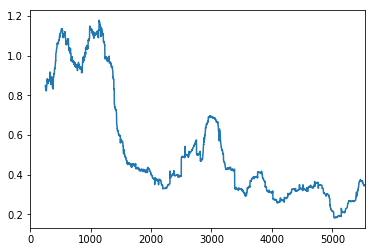

In [111]:
ticker_quotes['vol252'].plot()

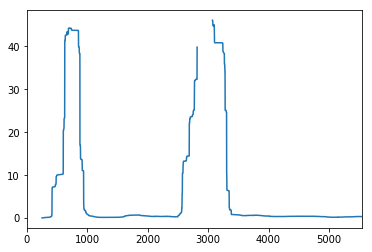

In [112]:
ticker_quotes['S_vol252'].plot()

In [52]:
ticker_quotes[['Close']].values

array([[31.473534],
       [28.880543],
       [31.473534],
       ...,
       [68.93    ],
       [68.32    ],
       [67.970001]])

In [51]:
ticker_quotes['Close'].values

array([31.473534, 28.880543, 31.473534, ..., 68.93    , 68.32    ,
       67.970001])

In [9]:
df = pd.DataFrame({'a':10, 'b':'xxx'},index=[0])

In [16]:
df.drop('a', axis=1)

,b
0,xxx


In [26]:
ticker='AAPL'
ticker_interim_data = pd.read_csv(base_data_path + interim_data_path + 'interim_data/' + ticker + '.csv', index_col=0)
ticker_interim_data.head()

,Ticker,Filing date,Quarter start,Quarter end,Open,Close,Cl_Max,Cl_Mean,Cl_Min,Cl_Std,...,count,Return_8.1,Return_7.1,Return_6.1,Return_5.1,Return_4.1,Return_3.1,Return_2.1,Return_1.1,count.1
0,AAPL,1994-01-26,1993-10-01,1993-12-31,0.812500,1.196429,1.258929,1.071864,0.785714,0.108522,...,4,0,0,0,0,1,1,1,1,4
1,AAPL,1994-08-12,1994-05-01,1994-07-01,1.071429,1.241071,1.254464,1.050353,0.879464,0.096318,...,3,0,0,0,0,0,1,1,1,3
2,AAPL,1994-12-13,1994-07-01,1994-09-30,0.941964,1.299107,1.562500,1.278785,0.906250,0.157441,...,1,0,0,0,0,0,0,0,1,1
3,AAPL,1995-02-09,1994-10-01,1994-12-30,1.200893,1.558036,1.716518,1.434311,1.160714,0.096866,...,0,0,0,0,0,0,0,0,0,0
4,AAPL,1995-05-15,1995-01-01,1995-03-31,1.388393,1.558036,1.716518,1.415179,1.200893,0.106166,...,0,0,0,0,0,0,0,0,0,0


In [29]:
c=ticker_interim_data.columns.str.contains('Return')
ticker_interim_data.loc[:,c]

,Return_8,Return_7,Return_6,Return_5,Return_4,Return_3,Return_2,Return_1,Return_8.1,Return_7.1,Return_6.1,Return_5.1,Return_4.1,Return_3.1,Return_2.1,Return_1.1
0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1
1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
x=[1,1,1,1,0,1,1,1,1,1]
int(''.join(map(str, x)), 2) >> 0  # binary to int

991

In [73]:
int(''.join(map(str, x)), 2) >> 5

30

In [81]:
import math
x = 790189438
math.log(x,10)

8.897731220423921

In [87]:
[np.array(x)] #.reshape(-1,1)

[array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])]

In [13]:
t=pd.read_csv('/home/md/Temp/stockprice/historical_stocks.csv')
f=pd.read_csv('/home/md/Temp/stockprice/historical_stock_prices.csv')

In [8]:
f.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [12]:
f[f['ticker']=='WIN']

,ticker,open,close,adj_close,low,high,volume,date
19190910,WIN,121.801567,119.921669,36.881954,119.451698,123.368149,1200800,2005-02-09
19190912,WIN,120.156654,121.409920,37.339664,119.843346,121.409920,200000,2005-02-10
19190928,WIN,120.783287,122.193214,37.580551,120.469971,122.349869,116500,2005-02-11
19190930,WIN,121.409920,121.566582,37.387836,120.626633,122.349869,63300,2005-02-14
19190931,WIN,121.488251,121.409920,37.339664,121.409920,122.663185,52300,2005-02-15
19190932,WIN,120.626633,124.151436,38.182793,120.626633,125.326370,65300,2005-02-16
19190947,WIN,124.778069,124.229767,38.206894,123.759789,126.031334,50100,2005-02-17
19190948,WIN,124.386421,125.326370,38.544163,124.386421,126.657967,80000,2005-02-18
19190949,WIN,124.543083,121.566582,37.387836,121.018280,124.543083,45500,2005-02-22
19190951,WIN,121.879898,122.741516,37.749180,121.409920,123.054832,55600,2005-02-23


In [16]:
t[t['ticker']=='WIN']
t[t['ticker']=='WINMQ']

,ticker,exchange,name,sector,industry
